<a href="https://colab.research.google.com/github/xslipstream/course-v3/blob/master/V2_Question_on_LR_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
data = ImageDataBunch.from_name_re(path_img, filenames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
# Try using resnet50
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:04<00:00, 22.1MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


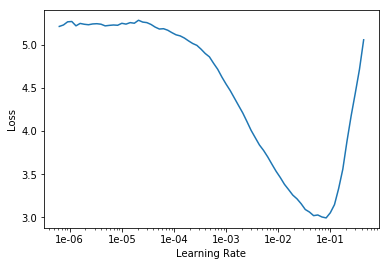

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.740480,0.301604,0.092016,03:22
1,0.585055,0.290550,0.092016,03:17
2,0.423294,0.292395,0.090663,03:17
3,0.337413,0.244130,0.073748,03:17
4,0.249212,0.190877,0.060893,03:17
5,0.172948,0.175507,0.051421,03:18
6,0.121764,0.169460,0.048038,03:18
7,0.106039,0.160510,0.046008,03:18


In [0]:
learn.save('stage-1-50v1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


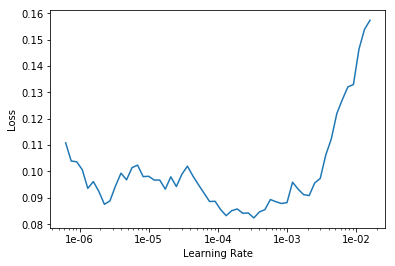

In [0]:
# Let's run lr find again and see what it looks like now
# LR # 2
learn.lr_find()
learn.recorder.plot()


### I think my fine-tune attempts here are only training the later layers because I already fitted the model once before I unfreeze.

I should've ran lr_find(), found a lr range, and THEN I unfreeze so my first fit_one_cycle() is taking account into my selected learning rate range

# **Fine-tune Attempt #1: Deepest Slope**
le-4 to le-2 appears to have the deepest decreasing slope but results are bad

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.200405,2.448116,0.512179,04:21
1,1.036613,0.514262,0.164411,04:17
2,0.454411,0.329967,0.108254,04:16


# **Fine-Tune Attempt 2**
Followed the course’s lr.  Best results in all 3 cycles.

In [0]:
learn.load('stage-1-50v1')
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.112840,0.163775,0.050744,04:16
1,0.096250,0.152789,0.042625,04:17
2,0.082140,0.153572,0.044655,04:16


# **Fine-Tune Attempt 3**
Tried to increase the end LR to le-3.  Although the final result is just as good as attempt #2, why is cycle #1 worst?  How should I be selecting learning rates for best results?

In [0]:
learn.load('stage-1-50v1');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.180241,0.212536,0.065629,04:16
1,0.157091,0.204099,0.061570,04:16
2,0.091124,0.172384,0.053451,04:14


# **Fine-Tune Attempt 4**
Using Ray's suggestion 1e-3 to 1e-1

In [0]:
learn.load('stage-1-50v1');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,6.167770,272107.937500,0.970907,04:15
1,5.732313,271.788452,0.972260,04:14
2,3.839888,1343.193237,0.958728,04:14


# **Let's try this again.  This time I will unfreeze the entire model before my first fit and fine-tune right from the start**

In [0]:
data = ImageDataBunch.from_name_re(path_img, filenames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
# Try using resnet50
learn2 = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


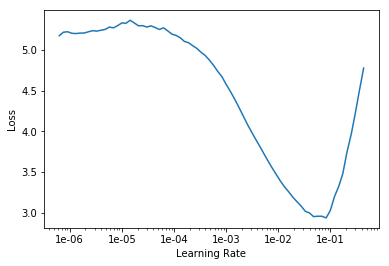

In [0]:
learn2.lr_find()
learn2.recorder.plot()

In [0]:
learn2.save('stage1-50-v2')

## Using Jeremy's LR ##

In [0]:
learn2.unfreeze()
learn2.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.779356,0.395085,0.113667,04:16
1,0.595152,0.235820,0.077808,04:16
2,0.393504,0.223573,0.074425,04:16


## Using what I think ##

In [0]:
learn2.load('stage1-50-v2')
learn2.unfreeze()
learn2.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.241324,3.753330,0.563599,04:16
1,1.167727,0.572722,0.182679,04:16
2,0.512363,0.319203,0.101489,04:17


## Using Ray's suggestion ##

In [0]:
learn2.load('stage1-50-v2')
learn2.unfreeze()
learn2.fit_one_cycle(3, max_lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,6.648335,5092.877441,0.962788,04:18
1,5.641720,1175.564209,0.953315,04:17
2,3.777241,400.749146,0.941813,04:17
